In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import re

In [2]:
np.sum


<function numpy.core.fromnumeric.sum>

In [3]:
?pd.read_csv

In [4]:
! head -n 2 ./data/credit-training.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
train = pd.read_csv('https://raw.githubusercontent.com/yhat/DataGotham2013/master/notebooks/data/credit-data-trainingset.csv')

In [6]:
test = pd.read_csv('https://raw.githubusercontent.com/yhat/DataGotham2013/master/notebooks/data/credit-data-testset.csv')

In [8]:
train.head()

serious_dlqin2yrs  revolving_utilization_of_unsecured_lines  age  \
0                  1                                  0.766127   45   
1                  0                                  0.957151   40   
2                  0                                  0.658180   38   
3                  0                                  0.907239   49   
4                  0                                  0.213179   74   

   number_of_time30-59_days_past_due_not_worse  debt_ratio  monthly_income  \
0                                            2    0.802982          9120.0   
1                                            0    0.121876          2600.0   
2                                            1    0.085113          3042.0   
3                                            1    0.024926         63588.0   
4                                            0    0.375607          3500.0   

   number_of_open_credit_lines_and_loans  number_of_times90_days_late  \
0                                     13                            0   
1                                      4                            0   
2                                      2                            1   
3                                      7                            0   
4                                      3                            0   

   number_real_estate_loans_or_lines  \
0                                  6   
1                                  0   
2                                  0   
3                                  1   
4                                  1   

   number_of_time60-89_days_past_due_not_worse  number_of_dependents  
0                                            0                   2.0  
1                                            0                   1.0  
2                                            0                   0.0  
3                                            0                   0.0  
4                                            0                   1.0

In [9]:
print(train.serious_dlqin2yrs.head())
type(train.serious_dlqin2yrs)

0    1
1    0
2    0
3    0
4    0
Name: serious_dlqin2yrs, dtype: int64


pandas.core.series.Series

In [12]:
train.dtypes

serious_dlqin2yrs                                int64
revolving_utilization_of_unsecured_lines       float64
age                                              int64
number_of_time30-59_days_past_due_not_worse      int64
debt_ratio                                     float64
monthly_income                                 float64
number_of_open_credit_lines_and_loans            int64
number_of_times90_days_late                      int64
number_real_estate_loans_or_lines                int64
number_of_time60-89_days_past_due_not_worse      int64
number_of_dependents                           float64
dtype: object

In [24]:
train.describe()

serious_dlqin2yrs  revolving_utilization_of_unsecured_lines  \
count      112415.000000                             112415.000000   
mean            0.066806                                  6.296153   
std             0.249687                                263.358839   
min             0.000000                                  0.000000   
25%             0.000000                                  0.030086   
50%             0.000000                                  0.155065   
75%             0.000000                                  0.560295   
max             1.000000                              50708.000000   

                 age  number_of_time30-59_days_past_due_not_worse  \
count  112415.000000                                112415.000000   
mean       52.282818                                     0.427781   
std        14.772929                                     4.266292   
min         0.000000                                     0.000000   
25%        41.000000                                     0.000000   
50%        52.000000                                     0.000000   
75%        63.000000                                     0.000000   
max       109.000000                                    98.000000   

          debt_ratio  monthly_income  number_of_open_credit_lines_and_loans  \
count  112415.000000    1.124150e+05                          112415.000000   
mean      347.844712    6.359829e+03                               8.451924   
std      1691.274257    1.310894e+04                               5.146886   
min         0.000000    0.000000e+00                               0.000000   
25%         0.174826    3.235000e+03                               5.000000   
50%         0.366463    5.200000e+03                               8.000000   
75%         0.869476    8.000000e+03                              11.000000   
max    307001.000000    3.008750e+06                              57.000000   

       number_of_times90_days_late  number_real_estate_loans_or_lines  \
count                112415.000000                      112415.000000   
mean                      0.272232                           1.016217   
std                       4.243559                           1.122465   
min                       0.000000                           0.000000   
25%                       0.000000                           0.000000   
50%                       0.000000                           1.000000   
75%                       0.000000                           2.000000   
max                      98.000000                          29.000000   

       number_of_time60-89_days_past_due_not_worse  number_of_dependents  
count                                112415.000000         112415.000000  
mean                                      0.246417              0.737482  
std                                       4.229691              1.106977  
min                                       0.000000              0.000000  
25%                                       0.000000              0.000000  
50%                                       0.000000              0.000000  
75%                                       0.000000              1.000000  
max                                      98.000000             20.000000

In [25]:
train.age.describe(percentiles=[0.375,0.625])

count    112415.000000
mean         52.282818
std          14.772929
min           0.000000
37.5%        47.000000
50%          52.000000
62.5%        57.000000
max         109.000000
Name: age, dtype: float64

In [26]:
train.number_of_dependents.unique()

array([  2.,   1.,   0.,   3.,   4.,   5.,   6.,   8.,   7.,  20.,  10.,
         9.,  13.])

In [27]:
train.number_of_dependents.nunique()

13

In [28]:
pd.value_counts(train.number_of_dependents)
train.number_of_dependents.value_counts()

0.0     67999
1.0     19812
2.0     14659
3.0      7068
4.0      2128
5.0       568
6.0       112
7.0        38
8.0        19
9.0         5
10.0        5
13.0        1
20.0        1
Name: number_of_dependents, dtype: int64

In [29]:
pd.value_counts(train.number_of_dependents, ascending=True)

20.0        1
13.0        1
10.0        5
9.0         5
8.0        19
7.0        38
6.0       112
5.0       568
4.0      2128
3.0      7068
2.0     14659
1.0     19812
0.0     67999
Name: number_of_dependents, dtype: int64

In [30]:
pd.value_counts(train.number_of_dependents, sort=False)

2.0     14659
0.0     67999
4.0      2128
8.0        19
10.0        5
3.0      7068
20.0        1
9.0         5
1.0     19812
5.0       568
6.0       112
13.0        1
7.0        38
Name: number_of_dependents, dtype: int64

In [31]:
#chain value_counts together with head() to give you the top 3
pd.value_counts(train.number_of_dependents).head(3)

0.0    67999
1.0    19812
2.0    14659
Name: number_of_dependents, dtype: int64

In [32]:
pd.value_counts(train.number_of_dependents).plot(kind='bar')

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [34]:
pd.crosstab(train.number_of_times90_days_late, train.serious_dlqin2yrs)

serious_dlqin2yrs                 0     1
number_of_times90_days_late              
0                            101251  4906
1                              2636  1325
2                               568   570
3                               198   288
4                                79   150
5                                28    68
6                                24    39
7                                 6    24
8                                 5    11
9                                 3    10
10                                2     3
11                                2     2
12                                1     0
13                                0     2
14                                1     1
15                                2     0
17                                0     1
96                                1     4
98                               98   106

In [35]:
pd.crosstab(train.age, train.number_of_dependents)

number_of_dependents  0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
age                                                                          
0                        0     0     1     0     0     0     0     0     0   
21                     130     3     1     0     0     0     0     0     0   
22                     319     6     1     1     0     0     0     0     0   
23                     429    24    11     2     0     0     0     0     0   
24                     558    34    16     2     1     0     0     0     0   
25                     614    64    24     5     5     0     0     0     0   
26                     739    95    41    10     4     0     0     0     0   
27                     805   147    44    25     2     0     0     0     0   
28                     871   148    88    32     5     1     0     0     0   
29                     940   191   111    34    10     1     1     0     0   
30                    1036   218   133    55    10     6     0     0     0   
31                    1004   269   188    64    16     3     0     0     0   
32                     931   310   219    84    45     3     0     0     0   
33                     968   343   239   103    40     8     1     0     0   
34                     870   291   269   113    47     7     1     0     0   
35                     894   312   296   127    46     8     2     1     1   
36                     872   331   369   159    34     9     3     0     0   
37                     840   369   414   215    61    14     2     0     0   
38                     848   373   463   208    66    24     3     0     0   
39                     918   414   521   280    85    18     3     1     0   
40                     906   430   581   297    68    34     2     1     1   
41                     922   395   596   333    87    24     1     0     1   
42                     855   408   551   312   101    32     4     2     0   
43                     904   409   585   318   116    27     7     3     1   
44                     901   431   636   361   101    30     5     2     0   
45                    1041   460   619   321   114    25     8     2     0   
46                    1037   520   646   377   125    28     5     6     1   
47                    1128   503   655   368   107    31     7     0     2   
48                    1198   571   591   353   112    27     9     3     1   
49                    1257   534   606   318    97    33     6     5     1   
..                     ...   ...   ...   ...   ...   ...   ...   ...   ...   
76                     737   133    12     0     0     0     0     0     0   
77                     713    97     9     1     0     0     0     0     0   
78                     708    99     9     2     1     0     0     0     0   
79                     641   100     7     2     0     0     0     0     0   
80                     562    79     6     1     0     0     0     0     0   
81                     535    60     5     0     0     0     0     0     0   
82                     426    55     1     0     1     0     0     0     0   
83                     335    35     1     0     0     0     0     0     0   
84                     332    21     1     0     0     0     0     0     0   
85                     333    23     2     0     0     0     0     0     0   
86                     253    37     2     0     1     0     0     0     0   
87                     245    17     1     0     0     0     0     0     0   
88                     225    14     1     0     0     0     0     0     0   
89                     192     6     0     0     0     0     0     0     0   
90                     124    13     0     0     0     0     0     0     0   
91                     111     6     0     0     0     0     0     0     0   
92                      63     6     0     0     0     0     0     0     0   
93                      63     2     0     0     0     0     0     0     0   
94                    

In [36]:
# %load https://gist.github.com/glamp/6529725/raw/e38ffd2fc4cb840be21098486ffe5df991946736/camel_to_snake.py
def camel_to_snake(column_name):
    """
    converts a string that is camelCase into snake_case
    Example:
        print camel_to_snake("javaLovesCamelCase")
        > java_loves_camel_case
    See Also:
        http://stackoverflow.com/questions/1175208/elegant-python-function-to-convert-camelcase-to-camel-case
    """
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', column_name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

In [37]:
camel_to_snake("javaLovesCamelCase")

'java_loves_camel_case'

In [38]:
train.columns = [camel_to_snake(col) for col in train.columns]
train.columns.tolist()

['serious_dlqin2yrs',
 'revolving_utilization_of_unsecured_lines',
 'age',
 'number_of_time30-59_days_past_due_not_worse',
 'debt_ratio',
 'monthly_income',
 'number_of_open_credit_lines_and_loans',
 'number_of_times90_days_late',
 'number_real_estate_loans_or_lines',
 'number_of_time60-89_days_past_due_not_worse',
 'number_of_dependents']

In [39]:
columns_i_want = ['monthly_income', 'serious_dlqin2yrs']
train[columns_i_want].head()

monthly_income  serious_dlqin2yrs
0          9120.0                  1
1          2600.0                  0
2          3042.0                  0
3         63588.0                  0
4          3500.0                  0

In [40]:
train['newcolumn'] = 'Srinidhi-Bewarsi'
# this will throw an error


In [41]:
train.head()

serious_dlqin2yrs  revolving_utilization_of_unsecured_lines  age  \
0                  1                                  0.766127   45   
1                  0                                  0.957151   40   
2                  0                                  0.658180   38   
3                  0                                  0.907239   49   
4                  0                                  0.213179   74   

   number_of_time30-59_days_past_due_not_worse  debt_ratio  monthly_income  \
0                                            2    0.802982          9120.0   
1                                            0    0.121876          2600.0   
2                                            1    0.085113          3042.0   
3                                            1    0.024926         63588.0   
4                                            0    0.375607          3500.0   

   number_of_open_credit_lines_and_loans  number_of_times90_days_late  \
0                                     13                            0   
1                                      4                            0   
2                                      2                            1   
3                                      7                            0   
4                                      3                            0   

   number_real_estate_loans_or_lines  \
0                                  6   
1                                  0   
2                                  0   
3                                  1   
4                                  1   

   number_of_time60-89_days_past_due_not_worse  number_of_dependents  \
0                                            0                   2.0   
1                                            0                   1.0   
2                                            0                   0.0   
3                                            0                   0.0   
4                                            0                   1.0   

          newcolumn  
0  Srinidhi-Bewarsi  
1  Srinidhi-Bewarsi  
2  Srinidhi-Bewarsi  
3  Srinidhi-Bewarsi  
4  Srinidhi-Bewarsi

In [42]:
del train['newcolumn']

In [43]:
gt_5k = train[train.monthly_income > 5000]
print (len(gt_5k),"people with monthly_income > 5000")
train[train.monthly_income > 5000].head()

57690 people with monthly_income > 5000


serious_dlqin2yrs  revolving_utilization_of_unsecured_lines  age  \
0                  1                                  0.766127   45   
3                  0                                  0.907239   49   
6                  0                                  0.189169   57   
8                  0                                  0.018798   51   
9                  0                                  0.010352   46   

   number_of_time30-59_days_past_due_not_worse  debt_ratio  monthly_income  \
0                                            2    0.802982          9120.0   
3                                            1    0.024926         63588.0   
6                                            0    0.606291         23684.0   
8                                            0    0.531529          6501.0   
9                                            0    0.298354         12454.0   

   number_of_open_credit_lines_and_loans  number_of_times90_days_late  \
0                                     13                            0   
3                                      7                            0   
6                                      9                            0   
8                                      7                            0   
9                                     13                            0   

   number_real_estate_loans_or_lines  \
0                                  6   
3                                  1   
6                                  4   
8                                  2   
9                                  2   

   number_of_time60-89_days_past_due_not_worse  number_of_dependents  
0                                            0                   2.0  
3                                            0                   0.0  
6                                            0                   2.0  
8                                            0                   2.0  
9                                            0                   2.0

In [44]:
train.ix[40:45, 0:2]

C:\Users\Sush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


serious_dlqin2yrs  revolving_utilization_of_unsecured_lines
40                  0                                  0.337521
41                  0                                  0.006799
42                  0                                  0.004264
43                  0                                  0.269484
44                  0                                  0.827708
45                  1                                  0.133063

In [45]:
mask = (train.monthly_income > 5000) & (train.serious_dlqin2yrs==1)
train[mask].head()

serious_dlqin2yrs  revolving_utilization_of_unsecured_lines  age  \
0                    1                                  0.766127   45   
45                   1                                  0.133063   49   
104                  1                                  1.046279   47   
115                  1                                  0.085338   51   
150                  1                                  0.973339   61   

     number_of_time30-59_days_past_due_not_worse  debt_ratio  monthly_income  \
0                                              2    0.802982          9120.0   
45                                             1    0.182882         10257.0   
104                                            1    1.104301          5416.0   
115                                            0    0.477504          6200.0   
150                                            1    0.209962          5500.0   

     number_of_open_credit_lines_and_loans  number_of_times90_days_late  \
0                                       13                            0   
45                                       9                            0   
104                                      6                            0   
115                                     11                            0   
150                                     11                            0   

     number_real_estate_loans_or_lines  \
0                                    6   
45                                   2   
104                                  2   
115                                  1   
150                                  0   

     number_of_time60-89_days_past_due_not_worse  number_of_dependents  
0                                              0                   2.0  
45                                             0                   3.0  
104                                            0                   1.0  
115                                            0                   0.0  
150                                            1                   1.0

In [46]:
mask = (train.age >= 35) & (train.serious_dlqin2yrs==0) & (train.number_of_open_credit_lines_and_loans < 10)
print(mask.head())

0    False
1     True
2     True
3     True
4     True
dtype: bool


In [47]:
mask = (train.monthly_income == train.monthly_income.quantile(0.75)) & (train.serious_dlqin2yrs==0)
len(train[mask])

1192

In [48]:
# By not specifying id_vars, we're going to melt EVERYTHING
train_lng = pd.melt(train)
# now our data is a series of (key, value) rows. 
#think of when you've done this in Excel so that you can
#create a pivot table 
train_lng.head()

variable  value
0  serious_dlqin2yrs    1.0
1  serious_dlqin2yrs    0.0
2  serious_dlqin2yrs    0.0
3  serious_dlqin2yrs    0.0
4  serious_dlqin2yrs    0.0

In [50]:
null_variables = train_lng.value.isnull()
null_variables.sum()

0

In [53]:
# crosstab creates a frequency table between 2 variables
# it's going to automatically enumerate the possibilities between
# the two Series and show you a count of occurrences 
#in each possible bucket
pd.crosstab(train_lng.variable, null_variables)

value                                         False
variable                                           
age                                          112415
debt_ratio                                   112415
monthly_income                               112415
number_of_dependents                         112415
number_of_open_credit_lines_and_loans        112415
number_of_time30-59_days_past_due_not_worse  112415
number_of_time60-89_days_past_due_not_worse  112415
number_of_times90_days_late                  112415
number_real_estate_loans_or_lines            112415
revolving_utilization_of_unsecured_lines     112415
serious_dlqin2yrs                            112415

In [56]:
# let's abstract that code into a function so we can easily 
# recalculate it
def print_null_freq(train):
    """
    for a given DataFrame, calculates how many values for 
    each variable is null and prints the resulting table to stdout
    """
    train_lng = pd.melt(train)
    null_variables = train_lng.value.isnull()
    return pd.crosstab(train_lng.variable, null_variables)
print_null_freq(train)

value                                         False
variable                                           
age                                          112415
debt_ratio                                   112415
monthly_income                               112415
number_of_dependents                         112415
number_of_open_credit_lines_and_loans        112415
number_of_time30-59_days_past_due_not_worse  112415
number_of_time60-89_days_past_due_not_worse  112415
number_of_times90_days_late                  112415
number_real_estate_loans_or_lines            112415
revolving_utilization_of_unsecured_lines     112415
serious_dlqin2yrs                            112415

In [59]:
melted = pd.melt(..., id_vars=[...], value_vars=[...])

print (len(melted)==300000)
print (melted.variable.unique()==np.array(['age', 'debt_ratio']))

AttributeError: 'ellipsis' object has no attribute 'columns'

In [70]:
s = pd.Series([1, 2, None, 4,5,6,7,8,9,None,None,12])
s

0      1.0
1      2.0
2      NaN
3      4.0
4      5.0
5      6.0
6      7.0
7      8.0
8      9.0
9      NaN
10     NaN
11    12.0
dtype: float64

In [71]:
s.fillna(3)



0      1.0
1      2.0
2      3.0
3      4.0
4      5.0
5      6.0
6      7.0
7      8.0
8      9.0
9      3.0
10     3.0
11    12.0
dtype: float64

In [72]:
s.ffill()

0      1.0
1      2.0
2      2.0
3      4.0
4      5.0
5      6.0
6      7.0
7      8.0
8      9.0
9      9.0
10     9.0
11    12.0
dtype: float64

In [73]:
s.bfill()

0      1.0
1      2.0
2      4.0
3      4.0
4      5.0
5      6.0
6      7.0
7      8.0
8      9.0
9     12.0
10    12.0
11    12.0
dtype: float64

In [75]:
s.fillna(s.mean())


0      1.0
1      2.0
2      6.0
3      4.0
4      5.0
5      6.0
6      7.0
7      8.0
8      9.0
9      6.0
10     6.0
11    12.0
dtype: float64

In [76]:
train.number_of_dependents = train.number_of_dependents.fillna(0)
# proof that the number_of_dependents no longer contains nulls
print_null_freq(train)

value                                         False
variable                                           
age                                          112415
debt_ratio                                   112415
monthly_income                               112415
number_of_dependents                         112415
number_of_open_credit_lines_and_loans        112415
number_of_time30-59_days_past_due_not_worse  112415
number_of_time60-89_days_past_due_not_worse  112415
number_of_times90_days_late                  112415
number_real_estate_loans_or_lines            112415
revolving_utilization_of_unsecured_lines     112415
serious_dlqin2yrs                            112415

In [79]:
train.monthly_income.describe()

count    1.124150e+05
mean     6.359829e+03
std      1.310894e+04
min      0.000000e+00
25%      3.235000e+03
50%      5.200000e+03
75%      8.000000e+03
max      3.008750e+06
Name: monthly_income, dtype: float64

In [81]:
train.head(1)

serious_dlqin2yrs  revolving_utilization_of_unsecured_lines  age  \
0                  1                                  0.766127   45   

   number_of_time30-59_days_past_due_not_worse  debt_ratio  monthly_income  \
0                                            2    0.802982          9120.0   

   number_of_open_credit_lines_and_loans  number_of_times90_days_late  \
0                                     13                            0   

   number_real_estate_loans_or_lines  \
0                                  6   

   number_of_time60-89_days_past_due_not_worse  number_of_dependents  
0                                            0                   2.0

In [82]:
import pandas as pd
import numpy as np
import pylab as pl

In [83]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [84]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [95]:
svm_clf = SVC()
neighbors_clf = KNeighborsClassifier()
clfs = [
    ("svc", SVC()),
    ("KNN", KNeighborsClassifier())
    ]
for name, clf in clfs:
    clf.fit(df[iris.feature_names], df.species)
    print (name, clf.predict(iris.data))
   
    print ("*"*80)

svc [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
********************************************************************************
KNN [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
********************************************************************************


In [86]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(df[iris.feature_names], df.species)
clf.predict(df[iris.feature_names])
pd.crosstab(df.species, clf.predict(df[iris.feature_names]))

col_0     0   1   2
species            
0        50   0   0
1         0  50   0
2         0   2  48

In [87]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_features="auto",
                                  min_samples_leaf=10)
clf.fit(df[iris.feature_names], df.species)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [89]:
from sklearn.externals.six import StringIO
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

In [98]:
# you will need to install graphviz 
#(http://www.graphviz.org/Download..php) and pydot (pip install pydot)
! dot -Tpng iris.dot -o iris.png

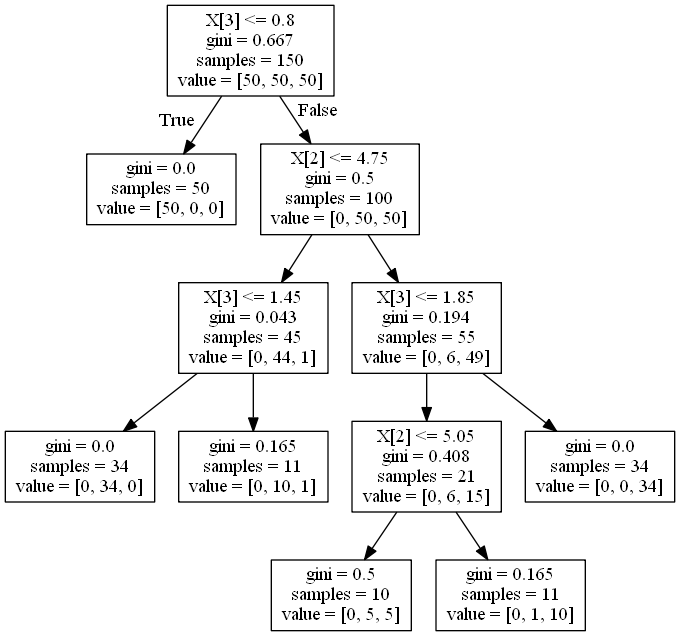

In [99]:
from IPython.core.display import Image
Image("iris.png")

In [100]:
Image(url="http://1.bp.blogspot.com/-ME24ePzpzIM/UQLWTwurfXI/AAAAAAAAANw/W3EETIroA80/s1600/drop_shadows_background.png",
      width=700)

In [101]:
from sklearn.datasets import load_boston
boston = load_boston()

In [106]:
import re


def camel_to_snake(column_name):
    """
    converts a string that is camelCase into snake_case
    Example:
        print camel_to_snake("javaLovesCamelCase")
        > java_loves_camel_case
    See Also:
        http://stackoverflow.com/questions/1175208/elegant-python-function-to-convert-camelcase-to-camel-case
    """
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', column_name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

df = pd.DataFrame(boston.data)
df.columns = [camel_to_snake(col) for col in boston.feature_names]
# add in prices
df['price'] = boston.target
print (len(df)==506)
df.head()

True


crim    zn  indus  chas    nox     rm   age     dis  rad    tax  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   ptratio       b  lstat  price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [107]:
from sklearn.linear_model import LinearRegression

features = ['age', 'lstat', 'tax']
lm = LinearRegression()
lm.fit(df[features], df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

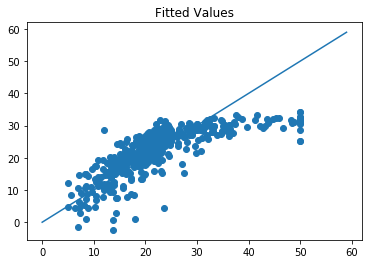

In [108]:
# add your actual vs. predicted points
pl.scatter(df.price, lm.predict(df[features]))
# add the line of perfect fit
straight_line = np.arange(0, 60)
pl.plot(straight_line, straight_line)
pl.title("Fitted Values")